# Adult Dataset

In [10]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy

#Importing Adult training Dataset
dataset_train = pd.read_csv('adult.data',header=None)
data_train = pd.DataFrame(dataset_train)


#Importing Adult test Dataset
dataset_test = pd.read_csv('adult.test',skiprows=1)
data_test = pd.DataFrame(dataset_test)


In [11]:
# Check if dataset has null values
result = data_test.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column:     ",end='')
print(result.sum())

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column:     25                    0
 Private              0
 226802               0
 11th                 0
 7                    0
 Never-married        0
 Machine-op-inspct    0
 Own-child            0
 Black                0
 Male                 0
 0                    0
 0.1                  0
 40                   0
 United-States        0
 <=50K.               0
dtype: int64


In [12]:
# replacing '?' values with most frequent value of that column
count_train = len(data_train.columns)
for i in range(0,count_train):
    present = ' ?' in data_train.iloc[:,i].get_values()
    if present:
        data_train.iloc[:,i] = data_train.iloc[:,i].replace(' ?',data_train.iloc[:,i].mode()[0])

count_test = len(data_test.columns)
for i in range(0,count_test):
    present = ' ?' in data_test.iloc[:,i].get_values()
    if present:
        data_test.iloc[:,i] = data_test.iloc[:,i].replace(' ?',data_test.iloc[:,i].mode()[0])

C:\Users\Manan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.
C:\Users\Manan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
C:\Users\Manan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Manan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


In [13]:

X = data_train.iloc[:, 1:14].values
Y = data_train.iloc[:, 14].values


X_test = data_test.iloc[:, 1:14].values
Y_test = data_test.iloc[:, 14].values

X_train = X
Y_train = Y

print(data_train)
print(data_test)
print(X.shape)
print(Y.shape)

#Setting up an array describing if a feature's data is discrete(D) or continuous(C)
datatype = np.array(['D','C','D','C','D','D','D','D','D','C','C','C','D'])

       0                  1       2            3   4                    5   \
0      39          State-gov   77516    Bachelors  13        Never-married   
1      50   Self-emp-not-inc   83311    Bachelors  13   Married-civ-spouse   
2      38            Private  215646      HS-grad   9             Divorced   
3      53            Private  234721         11th   7   Married-civ-spouse   
4      28            Private  338409    Bachelors  13   Married-civ-spouse   
...    ..                ...     ...          ...  ..                  ...   
32556  27            Private  257302   Assoc-acdm  12   Married-civ-spouse   
32557  40            Private  154374      HS-grad   9   Married-civ-spouse   
32558  58            Private  151910      HS-grad   9              Widowed   
32559  22            Private  201490      HS-grad   9        Never-married   
32560  52       Self-emp-inc  287927      HS-grad   9   Married-civ-spouse   

                       6               7       8        9      

In [14]:
dataset_train.info()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
25                    16280 non-null int64
 Private              16280 non-null object
 226802               16280 non-null int64
 11th                 16280 non-null object
 7                    16280 non-null int64
 Never-married        16280 non-null object
 Machine-op-inspct    16280 non-null object
 Own-child   

In [15]:
# Preprocessing the discrete data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0,13):
    if datatype[i]=='D':
        X_train[:,i]  = labelencoder.fit_transform(X_train[:,i])
        X_test[:,i]  = labelencoder.fit_transform(X_test[:,i])
Y_train = labelencoder.fit_transform(Y_train)
Y_test = labelencoder.fit_transform(Y_test)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [5,11], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf']},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': [10,20,30,50]},
    'RandomForestClassifier': {'n_estimators': [16, 32]},
    'AdaBoostClassifier': {'n_estimators': [16, 32], 'learning_rate':[0.8,1]},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-1, 1, 3), 'solver':['lbfgs','sag', 'saga']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(100,),(30,20)],'activation':['tanh', 'relu'], 'max_iter': [100,200]}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    np.random.seed(0);
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3)
    gridcv.fit(X_train, Y_train)
    Y_pred = gridcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(f1_score(Y_test, Y_pred, average='micro'),3)
    print("f1_sc for " + names[counter] + ":",accuracy[counter])

f1_sc for KNeighborsClassifier: 0.836
f1_sc for SVC: 0.85
f1_sc for DecisionTreeClassifier: 0.855
f1_sc for RandomForestClassifier: 0.841
f1_sc for AdaBoostClassifier: 0.855
f1_sc for LogisticRegression: 0.826
f1_sc for GaussianNB: 0.802
f1_sc for MLPClassifier: 0.847


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Adult dataset models accuracy')

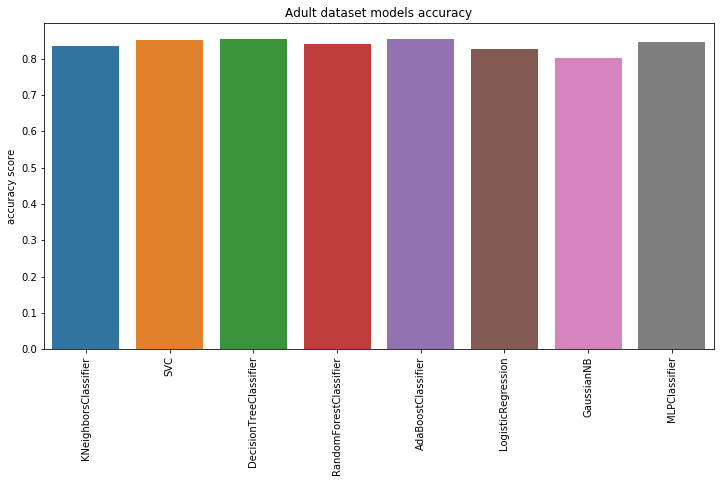

In [18]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6], accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Adult dataset models accuracy')